<a target="_blank" href="https://colab.research.google.com/github/kittyschulz/mdp/blob/main/mdp.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!git clone https://github.com/kittyschulz/mdp.git

In [ ]:
!mv ./mdp/bettermdptools ./bettermdptools
!mv ./mdp/taxi10x10.py ./taxi10x10.py
!pip install ./bettermdptools

In [12]:
import numpy as np
import math
import gym
import pygame
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from bettermdptools.algorithms.rl import RL
from bettermdptools.algorithms.planner import Planner
from bettermdptools.examples.test_env import TestEnv
from bettermdptools.examples.plots import Plots

In [13]:
def grid_world_policy_plot(data, n_states, label):
    data = np.around(np.array(data).reshape((n_states, n_states)), 2)
    df = pd.DataFrame(data=data)
    my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
    cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
    ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
    colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
    plt.title(label)
    plt.show()

def v_iters_plot(datasets, problems, label="Value"):
    for data in datasets:
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style="whitegrid")
        title = f"{label} per Iteration"
        sns.lineplot(x=df.index, y=label, data=df).set_title(title)
    plt.show()

def grid_values_heat_map(data, n_states, label):
    data = np.around(np.array(data).reshape((n_states, n_states)), 2)
    df = pd.DataFrame(data=data)
    sns.heatmap(df, annot=True).set_title(label)
    plt.show()

def plot_value_reward(problem, n_iters=1000):
    all_runs = []
    for _ in range(5):
        mdp = gym.make(problem, render_mode=None)
        planner = Planner(mdp.P)
        V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=1.0, n_iters=n_iters, theta=1e-10)
        all_runs.append(reward_track)
    var_mean = []
    var_std = []
    for i in range(len(all_runs[0])):
        var_mean.append(np.mean([x[i] for x in all_runs]))
        var_std.append(np.std([x[i] for x in all_runs]))
    var_std_lower = [var_mean[i] - var_std[i] for i in range(len(all_runs[0]))]
    var_std_upper = [var_mean[i] + var_std[i] for i in range(len(all_runs[0]))]
    plt.plot(range(n_iters), var_mean, markersize=5)
    plt.fill_between(range(n_iters), var_std_lower, var_std_upper, alpha=0.15)
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.title("Reward vs. Iteration")

def plot_value_delta(problem, n_iters=1000):
    all_runs = []
    for _ in range(5):
        mdp = gym.make(problem, render_mode=None)
        planner = Planner(mdp.P)
        V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=1.0, n_iters=n_iters, theta=1e-10)
        all_runs.append(delta_track)
    var_mean = []
    var_std = []
    for i in range(len(all_runs[0])):
        var_mean.append(np.mean([x[i] for x in all_runs]))
        var_std.append(np.std([x[i] for x in all_runs]))
    var_std_lower = [var_mean[i] - var_std[i] for i in range(len(all_runs[0]))]
    var_std_upper = [var_mean[i] + var_std[i] for i in range(len(all_runs[0]))]
    plt.plot(range(n_iters), var_mean, markersize=5)
    plt.fill_between(range(n_iters), var_std_lower, var_std_upper, alpha=0.15)
    plt.xlabel("Iterations")
    plt.ylabel("Delta")
    plt.title("Delta vs. Iteration")

def plot_value_V(mdp, n_iters=1000, max_iter=800, label=None):
    all_runs = []
    for _ in range(5):
        planner = Planner(mdp.P)
        V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=1.0, n_iters=n_iters, theta=1e-10)
        all_runs.append(V_track)
    var_mean = []
    var_std = []
    for i in range(len(all_runs[0])):
        var_mean.append(np.mean([x[i] for x in all_runs]))
        var_std.append(np.std([x[i] for x in all_runs]))
    var_std_lower = [var_mean[i] - var_std[i] for i in range(len(all_runs[0]))]
    var_std_upper = [var_mean[i] + var_std[i] for i in range(len(all_runs[0]))]
    plt.plot(range(max_iter), var_mean[:max_iter], label=label)
    plt.fill_between(range(max_iter), var_std_lower[:max_iter], var_std_upper[:max_iter], alpha=0.15)
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    plt.title("Value vs. Iteration")

def taxi_grid_world_policy_plot(data, n_states, label):
    data = np.around(np.array(data).reshape(n_states), 2)
    df = pd.DataFrame(data=data)
    my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
    cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
    ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([.4, 1.1, 1.9, 2.6, 3.4, 4.1])
    colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
    plt.title(label)
    plt.show()

In [3]:
new_map = ['SFFHHHFHFHHHFFHF', 
           'FFFFFHFFFFFFHHFH', 
           'FFFFFFFHFFFFFFFF', 
           'FFHFFFFFFFFFFFFH', 
           'FFFFFFHHFFFFFFFF', 
           'FHFFFFFFFFFHFHFF', 
           'FFHFFFFFFFFFHFFF', 
           'HFHFFFFFFFFFFFFF', 
           'FFFFFFFFFFHFFFHH', 
           'HFFFFFFFFFHFFFFF', 
           'FHFFFHFFFFHFFFFF', 
           'FFFFFFFFFFHFFFHF', 
           'FHFFFFFFFFFFFHHF', 
           'FFFFHFHFHFFFFFFF', 
           'FFFFFFFFFFHFFFFF', 
           'FFFHHFFFHHHHFHFG']

frozen_lake_4 = gym.make('FrozenLake-v1', map_name="4x4", render_mode='human')
frozen_lake_8 = gym.make('FrozenLake-v1', map_name="8x8", render_mode='human')
frozen_lake_16 = gym.make('FrozenLake-v1', map_name=None, desc=new_map, render_mode='human')

# Frozen Lake: Value Iteration

In [4]:
fl4_planner = Planner(frozen_lake_4.P)
fl4_V, fl4_V_track, fl4_delta_track, fl4_reward_track, fl4_pi = fl4_planner.value_iteration(gamma=1.0, n_iters=5000, theta=1e-32)

runtime = 0.11 seconds


In [5]:
fl8_planner = Planner(frozen_lake_8.P)
fl8_V, fl8_V_track, fl8_delta_track, fl8_reward_track, fl8_pi = fl8_planner.value_iteration(gamma=1.0, n_iters=5000, theta=1e-32)

runtime = 0.64 seconds


In [6]:
fl16_planner = Planner(frozen_lake_16.P)
fl16_V, fl16_V_track, fl16_delta_track, fl16_reward_track, fl16_pi = fl16_planner.value_iteration(gamma=1.0, n_iters=10000, theta=1e-32)

runtime = 7.65 seconds


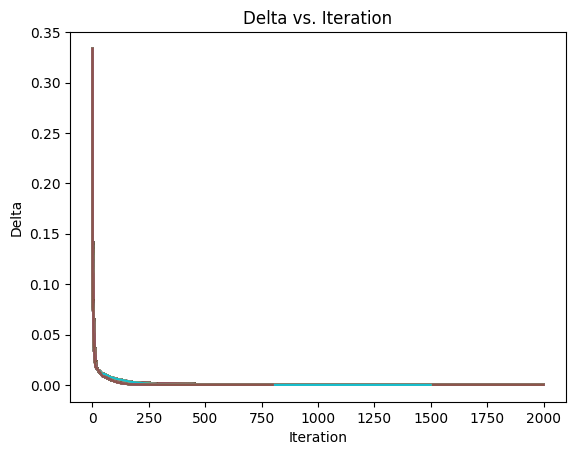

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 2000), fl16_delta_track[1:2000])
ax.plot(np.arange(1, 1500), fl8_delta_track[1:1500])
ax.plot(np.arange(1, 800), fl4_delta_track[1:800])
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
plt.show()

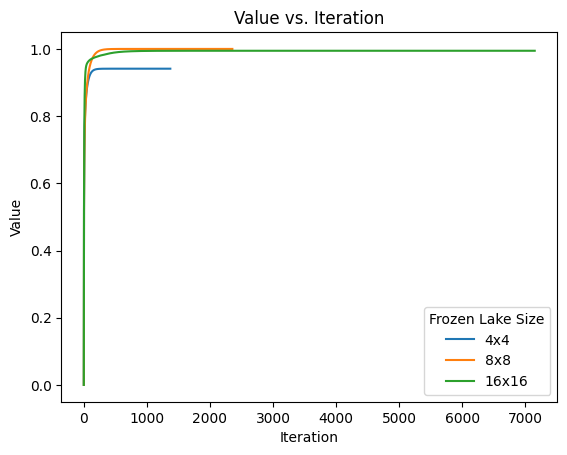

In [117]:
fig, ax = plt.subplots()
i = np.where(np.amax(fl4_V_track, axis=1)[1:] == 0)[0][0]
j = np.where(np.amax(fl8_V_track, axis=1)[1:] == 0)[0][0]
k = np.where(np.amax(fl16_V_track, axis=1)[1:] == 0)[0][0]
ax.plot(np.arange(i), np.amax(fl4_V_track[:i], axis=1), label='4x4')
ax.plot(np.arange(j), np.amax(fl8_V_track[:j], axis=1), label='8x8')
ax.plot(np.arange(k), np.amax(fl16_V_track[:k], axis=1), label='16x16')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Frozen Lake Size')
plt.show()

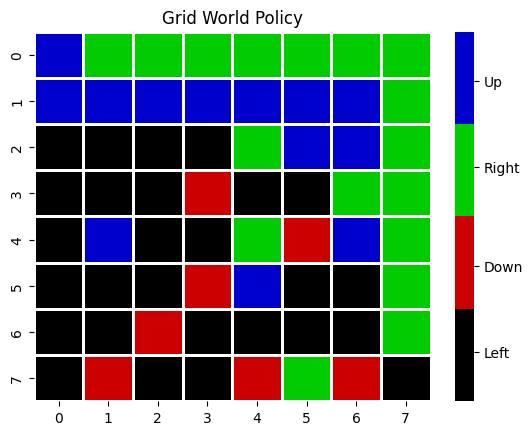

In [ ]:
n_states = frozen_lake_8.env.observation_space.n
new_pi = list(map(lambda x: fl8_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 8, "Grid World Policy")

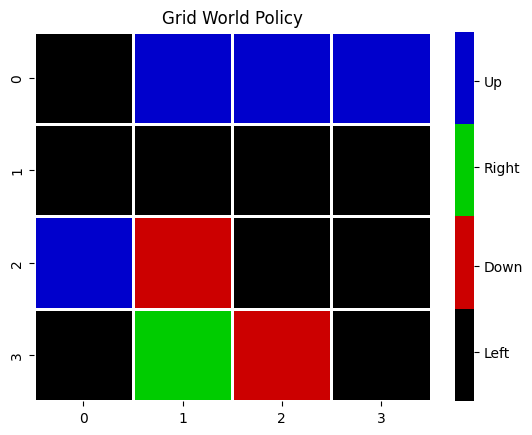

In [ ]:
n_states = frozen_lake_4.env.observation_space.n
new_pi = list(map(lambda x: fl4_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 4, "Grid World Policy")

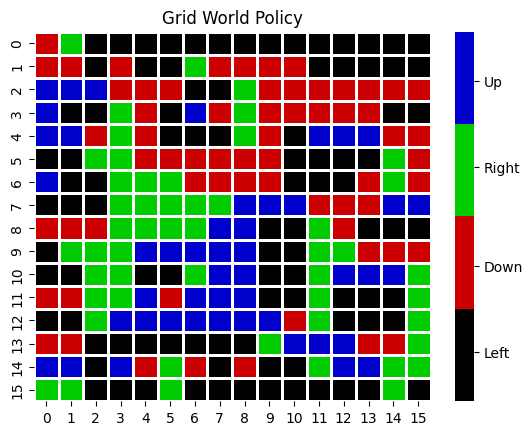

In [ ]:
n_states = frozen_lake_16.env.observation_space.n
new_pi = list(map(lambda x: fl16_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 16, "Grid World Policy")

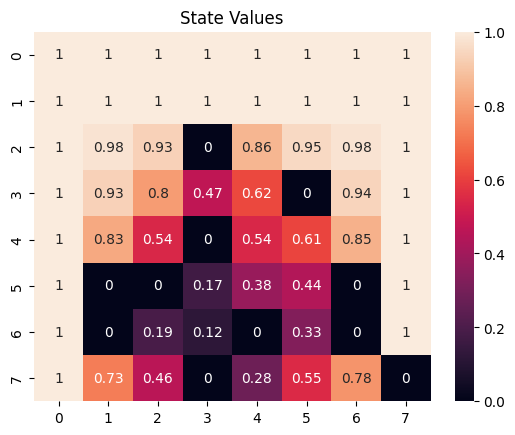

In [ ]:
grid_values_heat_map(fl8_V, 8, "State Values")

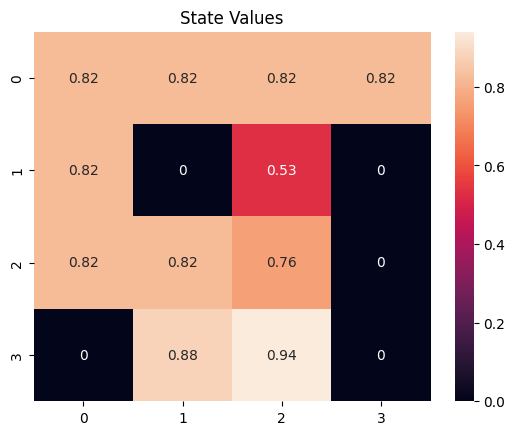

In [ ]:
grid_values_heat_map(fl4_V, 4, "State Values")

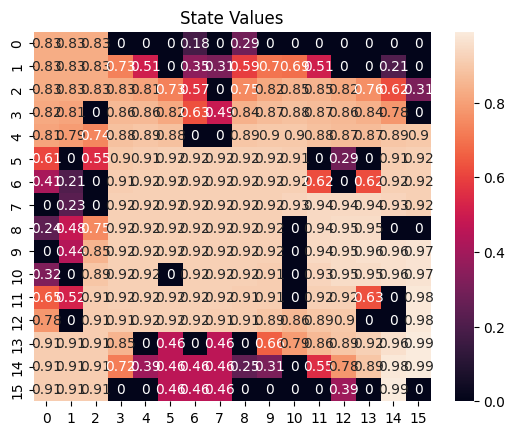

In [ ]:
grid_values_heat_map(fl16_V, 16, "State Values")

runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 4.16 seconds


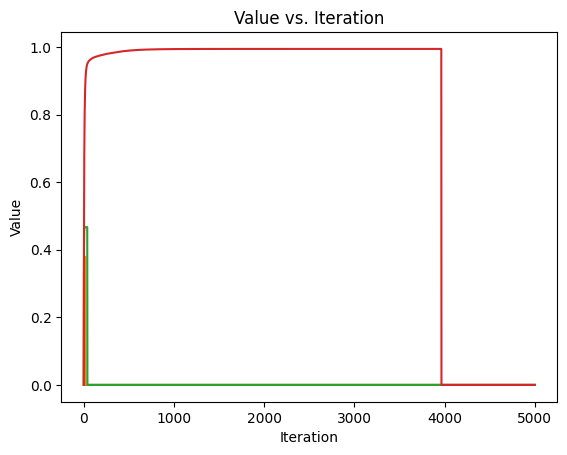

In [ ]:
fig, ax = plt.subplots()
for g in [0., 0.3, 0.6, 1.]:
    planner = Planner(frozen_lake_16.P)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    V, V_track, delta_track, reward_track, pi = fl16_planner.value_iteration(gamma=g, n_iters=5000, theta=1e-10)
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j])
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.40 seconds


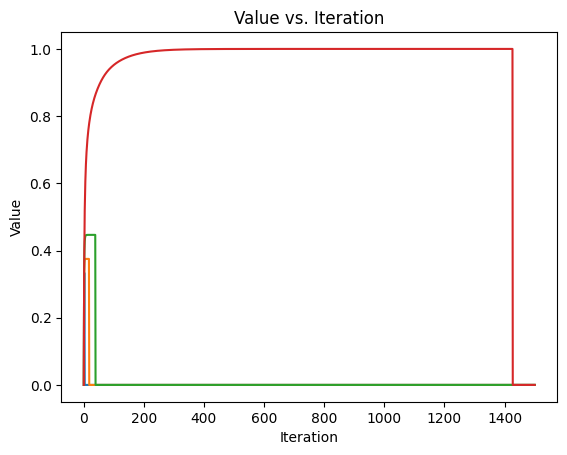

In [ ]:
fig, ax = plt.subplots()
for g in [0., 0.3, 0.6, 1.]:
    planner = Planner(frozen_lake_8.P)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    V, V_track, delta_track, reward_track, pi = fl8_planner.value_iteration(gamma=g, n_iters=1500, theta=1e-10)
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j])
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.04 seconds
runtime = 0.28 seconds


/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/planner.py:81: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


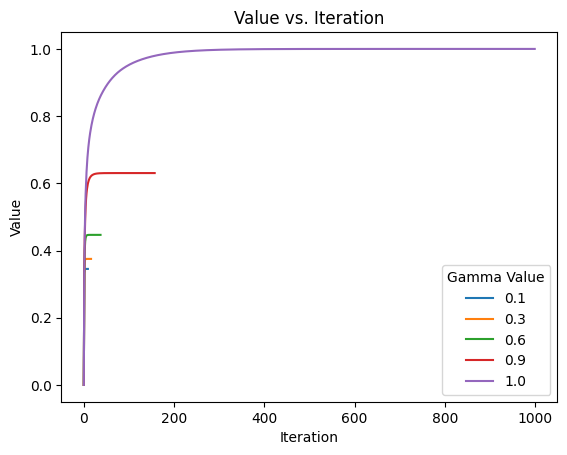

In [ ]:
fig, ax = plt.subplots()
for g in [0.1, 0.3, 0.6, 0.9, 1.]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.value_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.05 seconds
runtime = 0.29 seconds


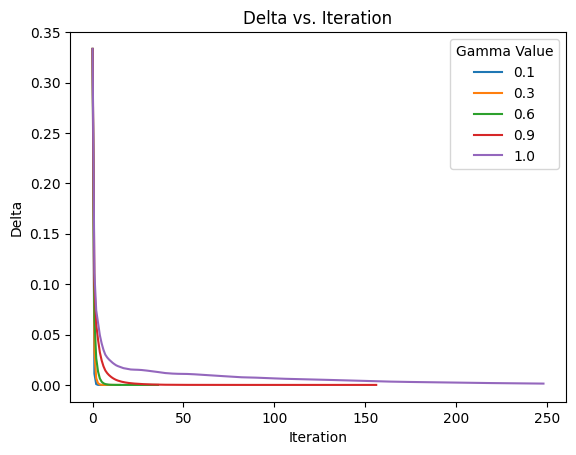

In [ ]:
fig, ax = plt.subplots()
for g in [0.1, 0.3, 0.6, 0.9, 1.]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.value_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 250
    ax.plot(np.arange(j-1), np.amax(delta_track, axis=1)[1:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 0.40 seconds
runtime = 0.22 seconds
runtime = 0.08 seconds


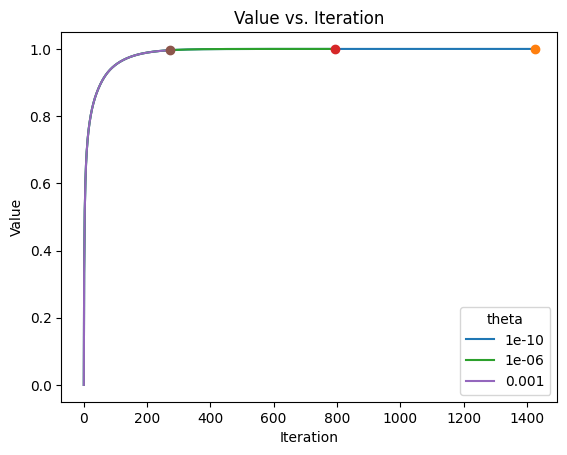

In [9]:
fig, ax = plt.subplots()
for t in [1e-10, 1e-6, 1e-3]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.value_iteration(gamma=1., n_iters=1500, theta=t)
    j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=t)
    ax.plot(j, np.amax(V_track, axis=1)[j], marker='o')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title="theta")
plt.show()


runtime = 0.06 seconds
runtime = 0.03 seconds
runtime = 0.01 seconds


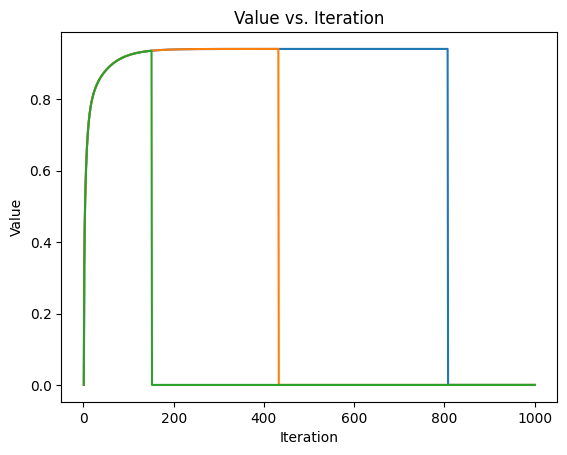

In [ ]:
fig, ax = plt.subplots()
for t in [1e-10, 1e-6, 1e-3]:
    planner = Planner(frozen_lake_4.P)
    V, V_track, delta_track, reward_track, pi = fl4_planner.value_iteration(gamma=1., n_iters=1000, theta=t)
    ax.plot(np.arange(1, 1001), np.amax(V_track, axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()


runtime = 4.20 seconds
runtime = 1.98 seconds
runtime = 0.44 seconds


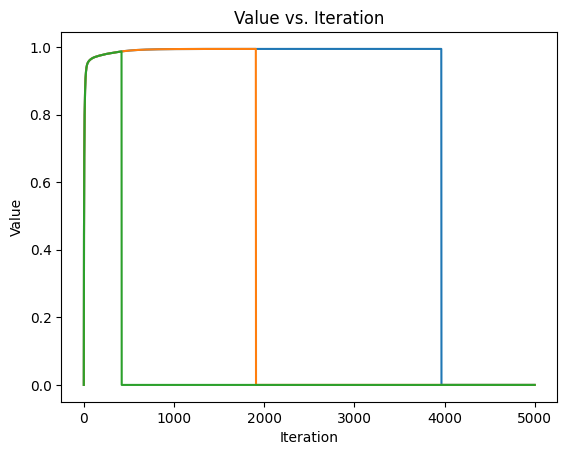

In [ ]:
fig, ax = plt.subplots()
for t in [1e-10, 1e-6, 1e-3]:
    planner = Planner(frozen_lake_16.P)
    V, V_track, delta_track, reward_track, pi = fl16_planner.value_iteration(gamma=1., n_iters=5000, theta=t)
    ax.plot(np.arange(1, 5001), np.amax(V_track, axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()


# Frozen Lake: Policy Iteration

In [ ]:
fl4_planner = Planner(frozen_lake_4.P)
fl4_V, fl4_V_track, fl4_delta_track, fl4_reward_track, fl4_pi = fl4_planner.policy_iteration(gamma=1.0, n_iters=50, theta=1e-12)

runtime = 0.14 seconds


In [106]:
fl8_planner = Planner(frozen_lake_8.P)
fl8_V, fl8_V_track, fl8_delta_track, fl8_reward_track, fl8_pi = fl8_planner.policy_iteration(gamma=0.5, n_iters=50, theta=1e-12)

runtime = 0.07 seconds


In [ ]:
fl16_planner = Planner(frozen_lake_16.P)
fl16_V, fl16_V_track, fl16_delta_track, fl16_reward_track, fl16_pi = fl16_planner.policy_iteration(gamma=0.999, n_iters=50, theta=1e-12)

runtime = 60.54 seconds


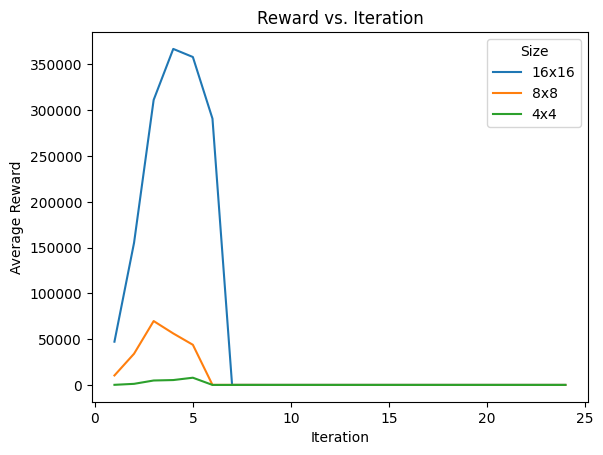

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 25), fl16_reward_track[1:25], label='16x16')
ax.plot(np.arange(1, 25), fl8_reward_track[1:25], label='8x8')
ax.plot(np.arange(1, 25), fl4_reward_track[1:25], label='4x4')
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Reward')
ax.set_title('Reward vs. Iteration')
plt.legend(title='Size')
plt.show()

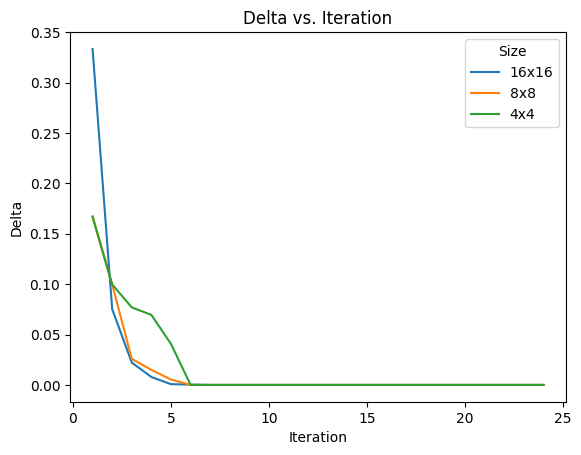

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 25), fl16_delta_track[1:25], label='16x16')
ax.plot(np.arange(1, 25), fl8_delta_track[1:25], label='8x8')
ax.plot(np.arange(1, 25), fl4_delta_track[1:25], label='4x4')
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
plt.legend(title='Size')
plt.show()

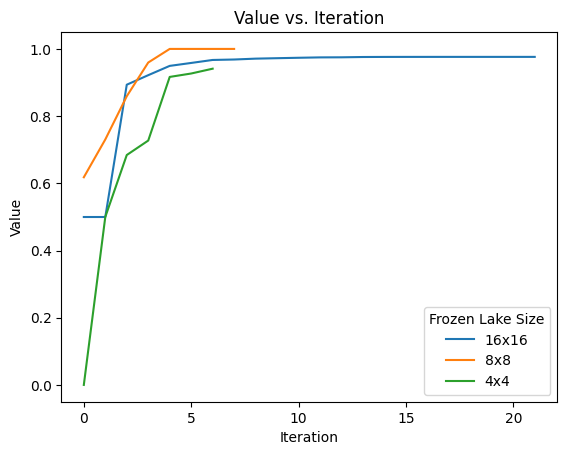

In [ ]:
fig, ax = plt.subplots()
i = np.where(np.amax(fl4_V_track, axis=1)[1:] == 0)[0][0] + 1
j = np.where(np.amax(fl8_V_track, axis=1)[1:] == 0)[0][0] + 1
k = np.where(np.amax(fl16_V_track, axis=1)[1:] == 0)[0][0] + 1
ax.plot(np.arange(k), np.amax(fl16_V_track, axis=1)[:k], label='16x16')
ax.plot(np.arange(j), np.amax(fl8_V_track, axis=1)[:j], label='8x8')
ax.plot(np.arange(i), np.amax(fl4_V_track, axis=1)[:i], label='4x4')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Frozen Lake Size')
plt.show()

In [ ]:
np.where(np.amax(fl4_V_track, axis=1)[1:] == 0)[0][0]

1373

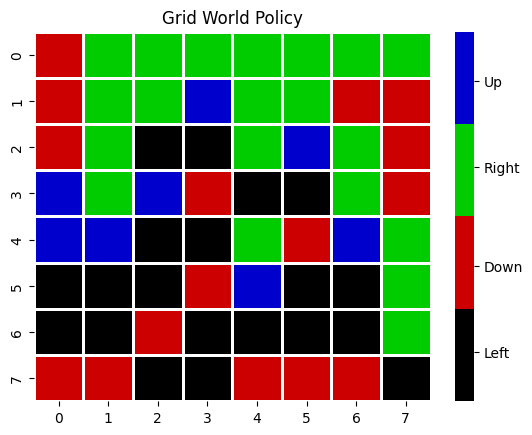

In [107]:
n_states = frozen_lake_8.env.observation_space.n
new_pi = list(map(lambda x: fl8_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 8, "Grid World Policy")

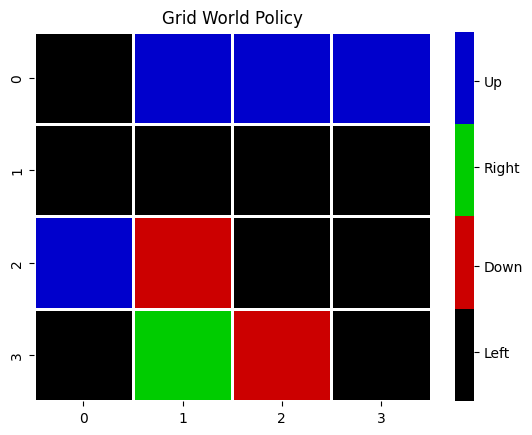

In [ ]:
n_states = frozen_lake_4.env.observation_space.n
new_pi = list(map(lambda x: fl4_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 4, "Grid World Policy")

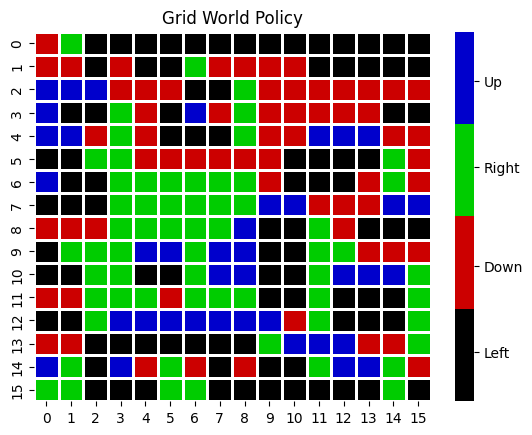

In [ ]:
n_states = frozen_lake_16.env.observation_space.n
new_pi = list(map(lambda x: fl16_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 16, "Grid World Policy")

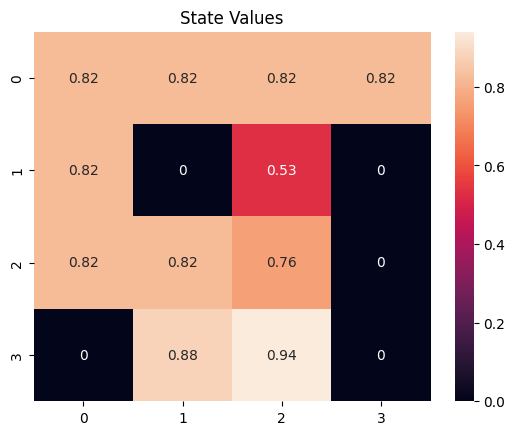

In [ ]:
grid_values_heat_map(fl4_V, 4, "State Values")

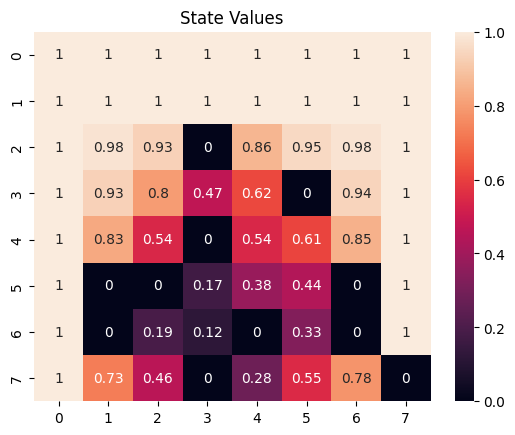

In [ ]:
grid_values_heat_map(fl8_V, 8, "State Values")

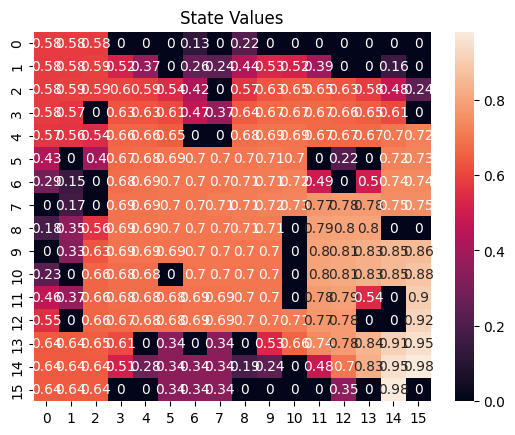

In [ ]:
grid_values_heat_map(fl16_V, 16, "State Values")

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.07 seconds
runtime = 0.18 seconds
runtime = 2.03 seconds


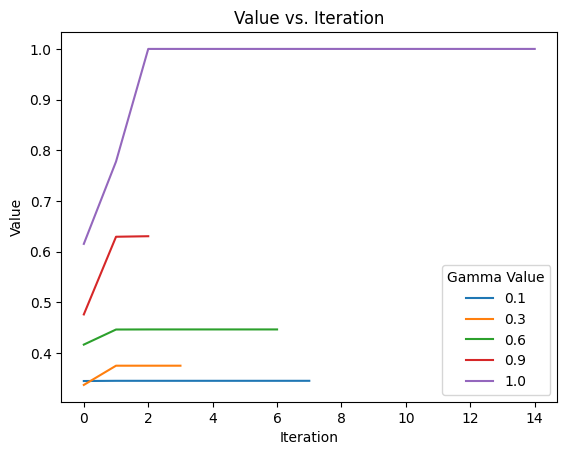

In [ ]:
fig, ax = plt.subplots()
for g in [0.1, 0.3, 0.6, 0.9, 1.]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.policy_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.05 seconds
runtime = 0.33 seconds
runtime = 1.79 seconds


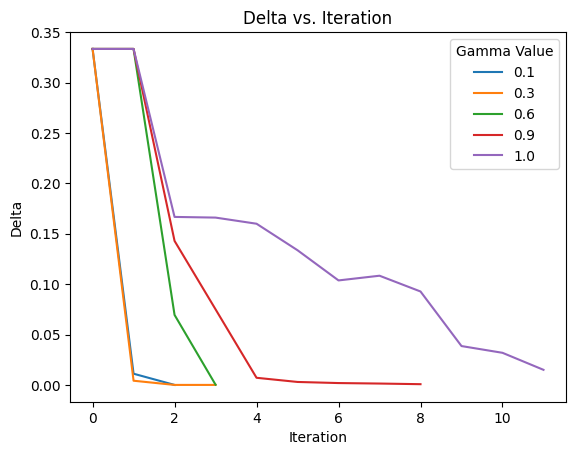

In [ ]:
fig, ax = plt.subplots()
for g in [0.1, 0.3, 0.6, 0.9, 1.]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.policy_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), delta_track[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 3.75 seconds
runtime = 0.98 seconds
runtime = 0.14 seconds


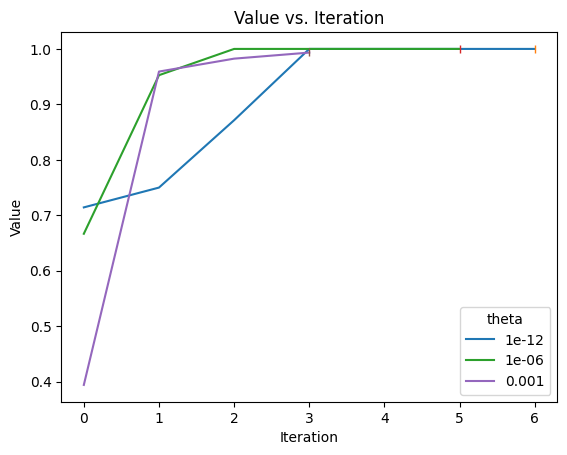

In [ ]:
fig, ax = plt.subplots()
for t in [1e-12, 1e-6, 1e-3]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.policy_iteration(gamma=1., n_iters=1500, theta=t)
    j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=t)
    ax.plot(j-1, np.amax(V_track, axis=1)[j], marker='|')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title="theta")
plt.show()


runtime = 2.14 seconds
runtime = 0.89 seconds
runtime = 0.15 seconds


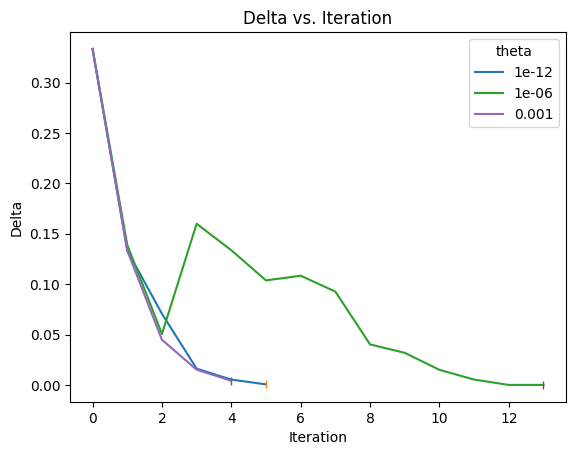

In [ ]:
fig, ax = plt.subplots()
for t in [1e-12, 1e-6, 1e-3]:
    planner = Planner(frozen_lake_8.P)
    V, V_track, delta_track, reward_track, pi = fl8_planner.policy_iteration(gamma=1., n_iters=1500, theta=t)
    j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    ax.plot(np.arange(j), delta_track[:j], label=t)
    ax.plot(j-1, delta_track[j-1], marker='|')
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
ax.legend(title="theta")
plt.show()


# Frozen Lake: Q Learning 

In [89]:
frozen_lake_4 = gym.make('FrozenLake-v1', map_name="4x4", render_mode=None)
frozen_lake_8 = gym.make('FrozenLake-v1', map_name="8x8", render_mode=None)
frozen_lake_16 = gym.make('FrozenLake-v1', map_name=None, desc=new_map, render_mode=None)

In [94]:
fl4_planner = RL(frozen_lake_4)
fl4_Q, fl4_V, fl4_pi, fl4_Q_track, fl4_pi_track = fl4_planner.q_learning(n_episodes=5000)

 22%|██▏       | 1112/5000 [00:00<00:00, 11110.77it/s]/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")
                                                      

runtime = 0.87 seconds


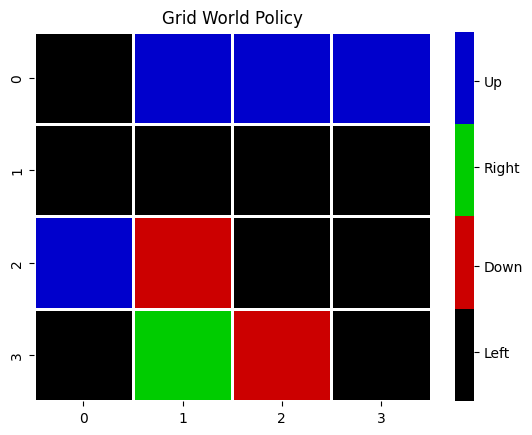

In [95]:
n_states = fl4_planner.env.observation_space.n
new_pi = list(map(lambda x: fl4_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 4, "Grid World Policy")

In [82]:
fl8_planner = RL(frozen_lake_8)
fl8_Q, fl8_V, fl8_pi, fl8_Q_track, fl8_pi_track = fl8_planner.q_learning(n_episodes=100000, init_epsilon=5, epsilon_decay_ratio=0.5, init_alpha=0.9)

  0%|          | 0/100000 [00:00<?, ?it/s]/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")
                                                        

runtime = 38.66 seconds


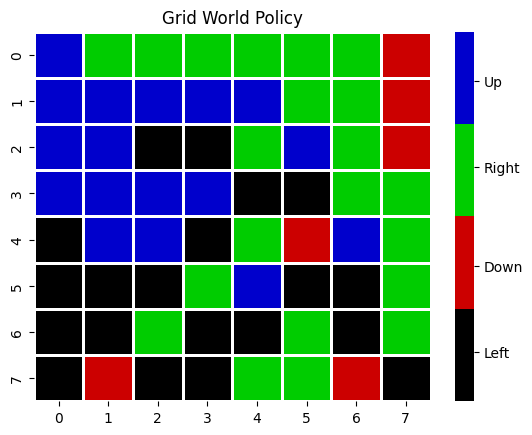

In [83]:
n_states = fl8_planner.env.observation_space.n
new_pi = list(map(lambda x: fl8_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 8, "Grid World Policy")

## Hyperparameter Tuning for 4x4 Frozen Lake

runtime = 1.15 seconds


runtime = 1.09 seconds


runtime = 2.01 seconds


runtime = 1.70 seconds


runtime = 1.29 seconds


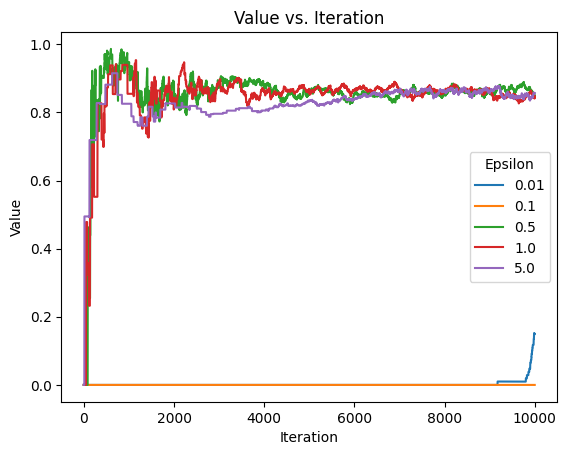

In [113]:
for i in [0.01, 0.1, 0.5, 1., 5.]:
    planner = RL(frozen_lake_4)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_epsilon=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon")
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 1.17 seconds


runtime = 1.88 seconds


runtime = 2.19 seconds


runtime = 1.71 seconds


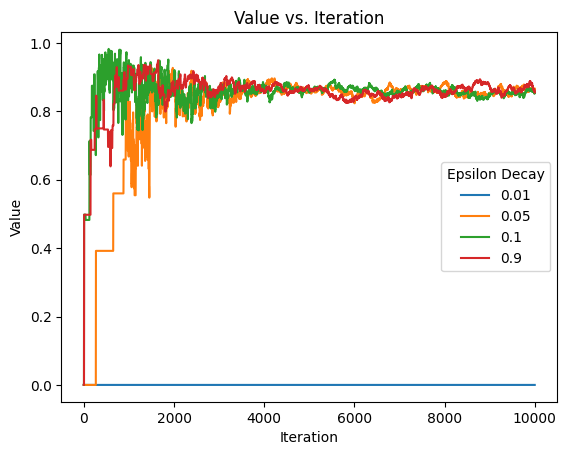

In [103]:
for i in [0.01, 0.05, 0.1, 0.9]:
    planner = RL(frozen_lake_4)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_epsilon=1., epsilon_decay_ratio=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon Decay")
plt.show()

runtime = 0.92 seconds


runtime = 1.57 seconds


runtime = 1.72 seconds


runtime = 1.72 seconds


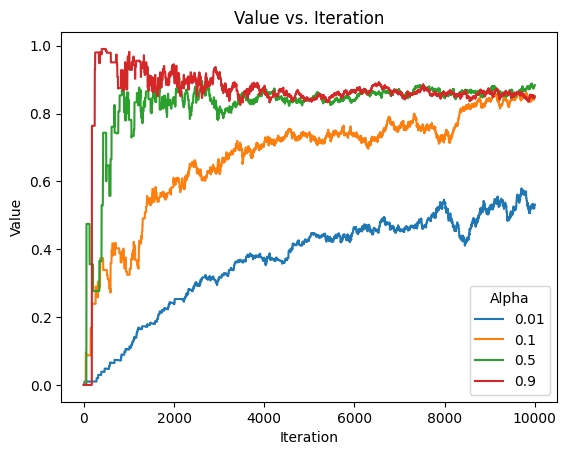

In [107]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(frozen_lake_4)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_alpha=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

runtime = 1.47 seconds


runtime = 1.65 seconds


runtime = 1.66 seconds


runtime = 1.66 seconds


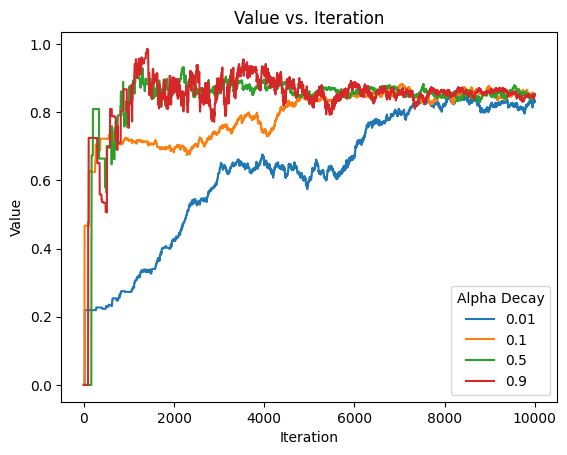

In [108]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(frozen_lake_4)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, alpha_decay_ratio=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha Decay")
plt.show()

## Hyperparameter Tuning for 8x8 Frozen Lake

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 4.98 seconds


runtime = 4.55 seconds


runtime = 3.34 seconds


runtime = 3.28 seconds


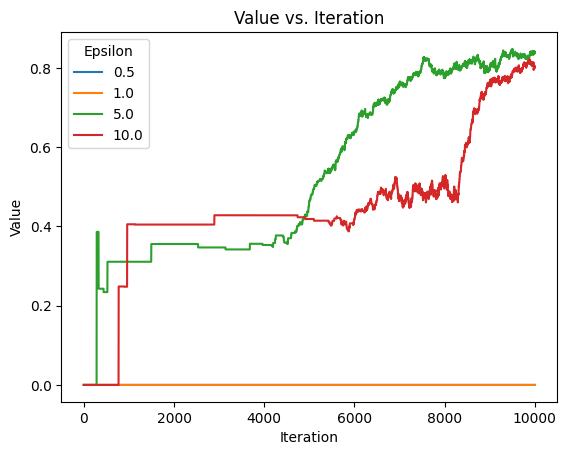

In [118]:
for i in [0.5, 1., 5., 10.]:
    planner = RL(frozen_lake_8)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_epsilon=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon")
plt.show()

runtime = 5.94 seconds


runtime = 5.89 seconds


runtime = 5.61 seconds


runtime = 3.29 seconds


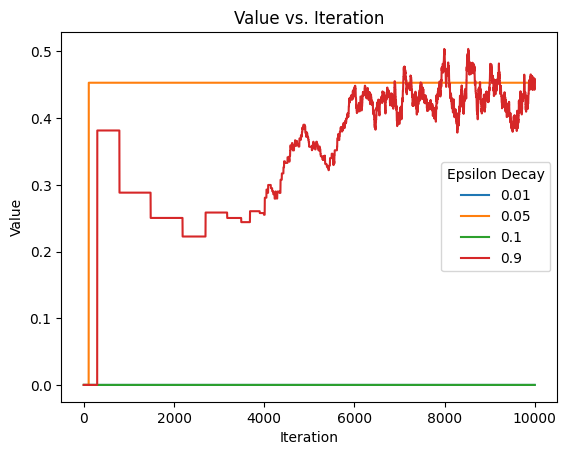

In [119]:
for i in [0.01, 0.05, 0.1, 0.9]:
    planner = RL(frozen_lake_8)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_epsilon=5., epsilon_decay_ratio=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon Decay")
plt.show()

runtime = 2.34 seconds


runtime = 2.65 seconds


runtime = 3.33 seconds


runtime = 3.56 seconds


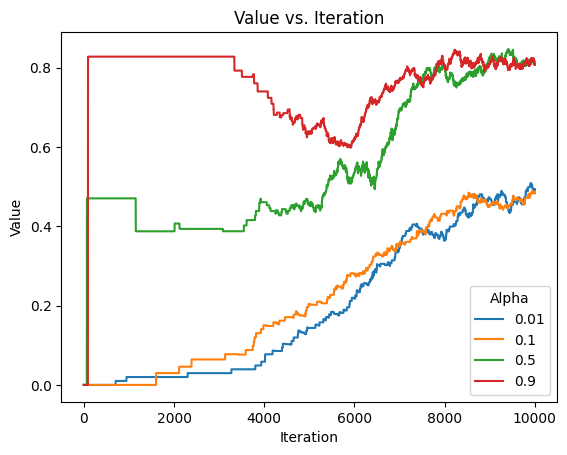

In [130]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(frozen_lake_8)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, init_epsilon=5., init_alpha=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

runtime = 4.75 seconds


runtime = 4.52 seconds


runtime = 4.54 seconds


runtime = 4.05 seconds


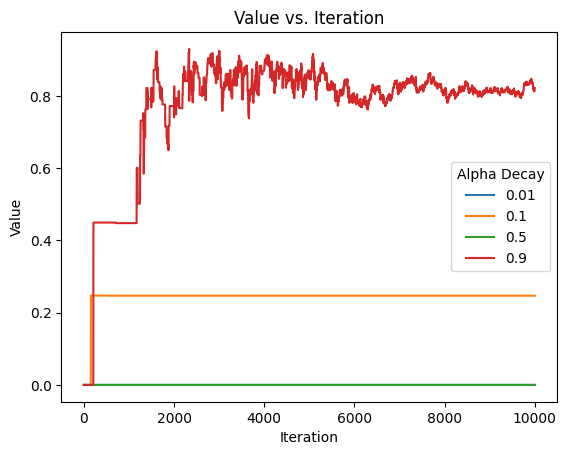

In [87]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(frozen_lake_8)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=10000, alpha_decay_ratio=i)
    plt.plot(np.arange(10000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha Decay")
plt.show()

## Hyperparameter Tuning for 16x16 Frozen Lake

In [20]:
frozen_lake_new = gym.make('FrozenLake-v1', map_name=None, desc=new_map, render_mode=None)

  0%|          | 0/500000 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 339.44 seconds


runtime = 339.69 seconds


runtime = 285.36 seconds


runtime = 249.65 seconds


runtime = 239.64 seconds


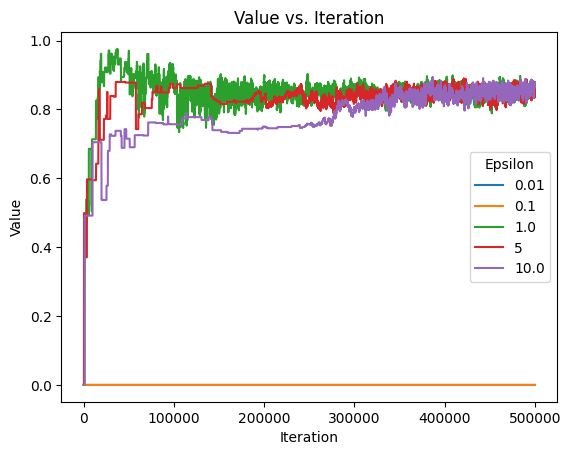

In [21]:
for i in [0.01, 0.1, 1., 5, 10.]:
    planner = RL(frozen_lake_new)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500000, init_epsilon=i)
    plt.plot(np.arange(500000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon")
plt.show()

  0%|          | 0/500000 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 344.52 seconds


runtime = 338.47 seconds


runtime = 337.81 seconds


runtime = 294.39 seconds


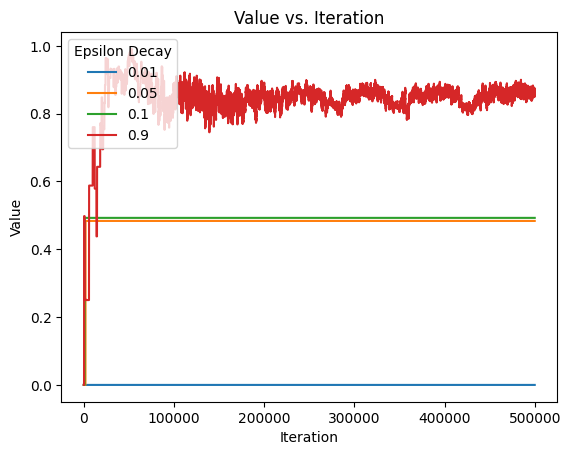

In [92]:
for i in [0.01, 0.05, 0.1, 0.9]:
    planner = RL(frozen_lake_new)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500000, init_epsilon=1., epsilon_decay_ratio=i)
    plt.plot(np.arange(500000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon Decay")
plt.show()

runtime = 306.16 seconds


runtime = 296.77 seconds


runtime = 292.27 seconds


runtime = 291.53 seconds


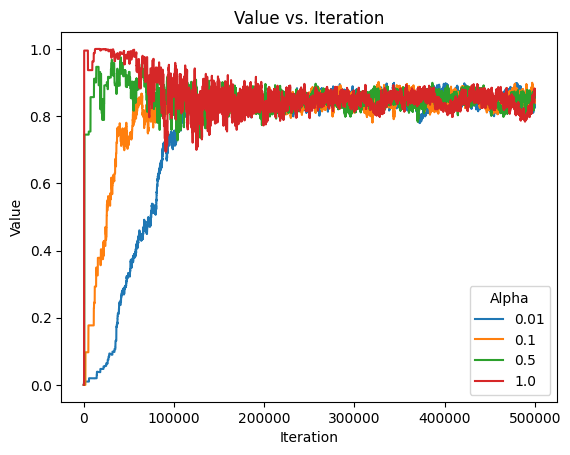

In [93]:
for i in [0.01, 0.1, 0.5, 1.]:
    planner = RL(frozen_lake_new)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500000, init_epsilon=1., init_alpha=i)
    plt.plot(np.arange(500000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

runtime = 304.05 seconds


runtime = 326.97 seconds


runtime = 322.94 seconds


runtime = 292.88 seconds


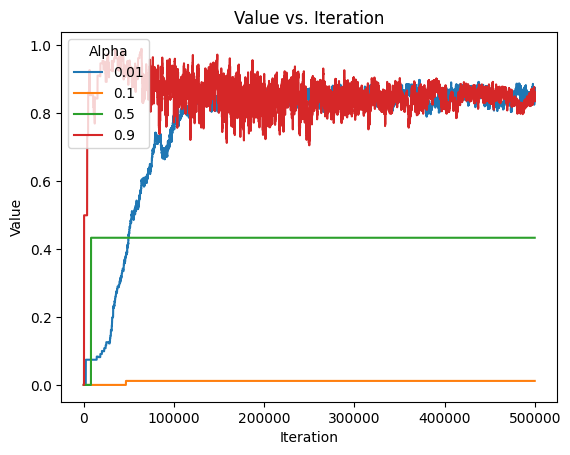

In [94]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(frozen_lake_new)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500000, alpha_decay_ratio=i)
    plt.plot(np.arange(500000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

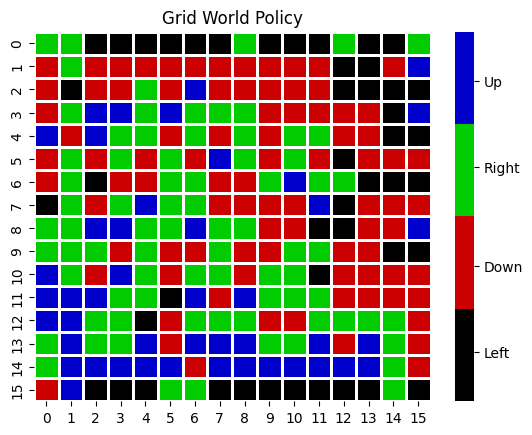

In [95]:
n_states = planner.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
grid_world_policy_plot(np.array(new_pi), 16, "Grid World Policy")

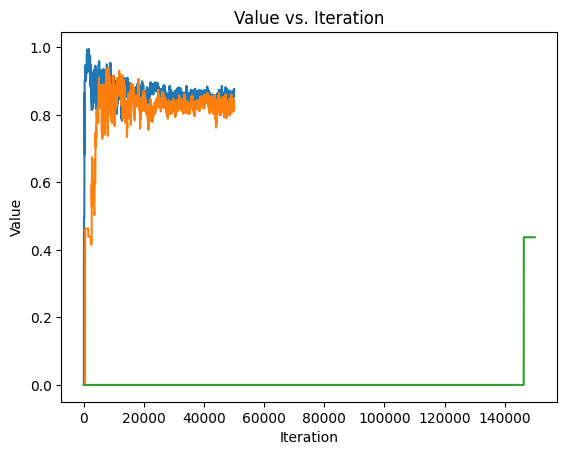

In [74]:
fig, ax = plt.subplots()
ax.plot(np.arange(50000), np.amax(np.amax(fl4_Q_track, axis=2), axis=1))
ax.plot(np.arange(50000), np.amax(np.amax(fl8_Q_track, axis=2), axis=1))
ax.plot(np.arange(150000), np.amax(np.amax(fl16_Q_track[:150000], axis=2), axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

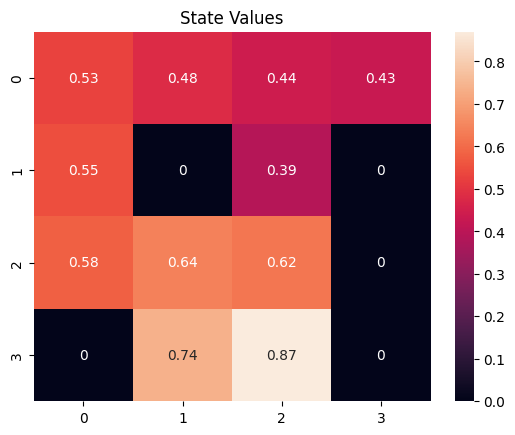

In [56]:
grid_values_heat_map(fl4_V, 4, "State Values")

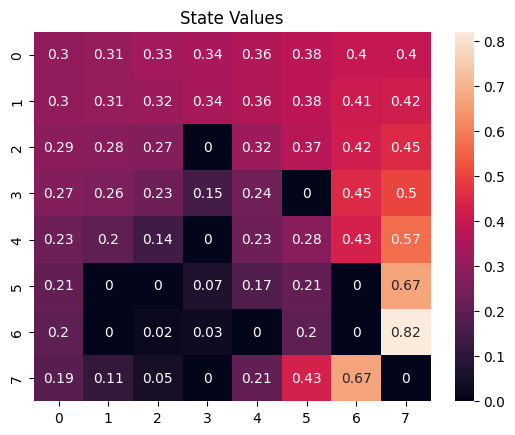

In [57]:
grid_values_heat_map(fl8_V, 8, "State Values")

In [ ]:
grid_values_heat_map(fl16_V, 16, "State Values")

# Taxi: Value Iteration

In [14]:
taxi = gym.make("Taxi-v3", render_mode='human')

In [99]:
taxi_planner = Planner(taxi.P)
texi_V, taxi_V_track, taxi_delta_track, taxi_reward_track, taxi_pi = taxi_planner.value_iteration(gamma=1.0, n_iters=1000, theta=1e-32)

runtime = 0.03 seconds


runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds


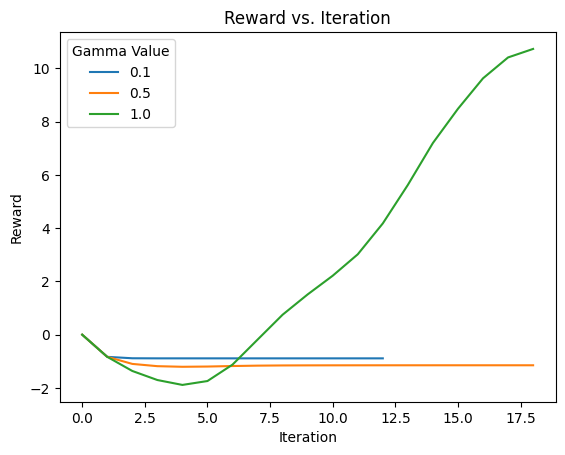

In [104]:
fig, ax = plt.subplots()
for g in [0.1, 0.5, 1.]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), reward_track[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Reward')
ax.set_title('Reward vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds


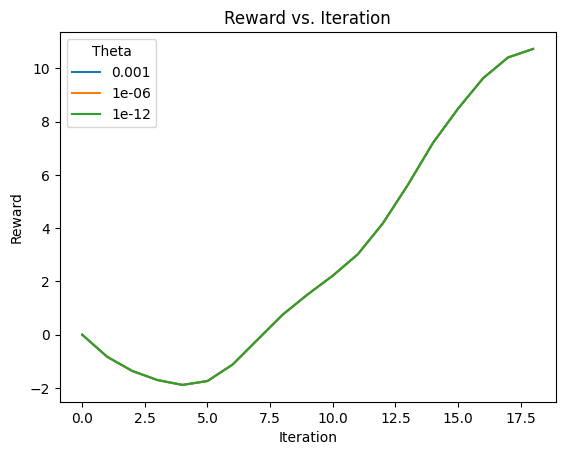

In [102]:
fig, ax = plt.subplots()
for g in [1e-3, 1e-6, 1e-12]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=1., n_iters=1000, theta=g)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), reward_track[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Reward')
ax.set_title('Reward vs. Iteration')
ax.legend(title='Theta')
plt.show()


In [ ]:
fig, ax = plt.subplots()
for g in [0.0001, 0.001, 0.01, 0.1, 1.]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()

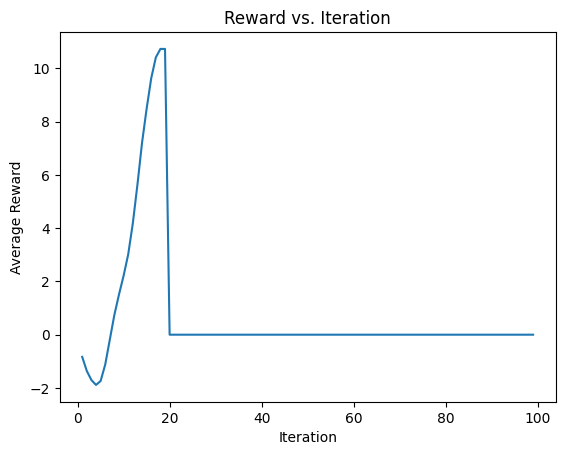

In [183]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 100), taxi_reward_track[1:100])
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Reward')
ax.set_title('Reward vs. Iteration')
plt.show()

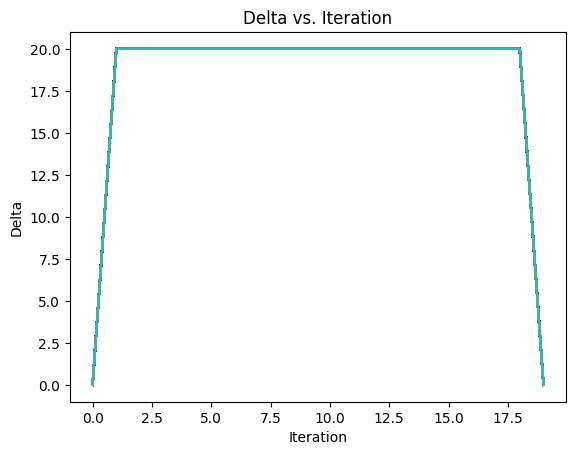

In [260]:
fig, ax = plt.subplots()
i = np.where(np.amax(taxi_V_track, axis=1)[1:] == 0)[0][0] + 1
ax.plot(np.arange(i), taxi_delta_track[:i])
# ax.set_ylim(-0.01, 0.1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
plt.show()

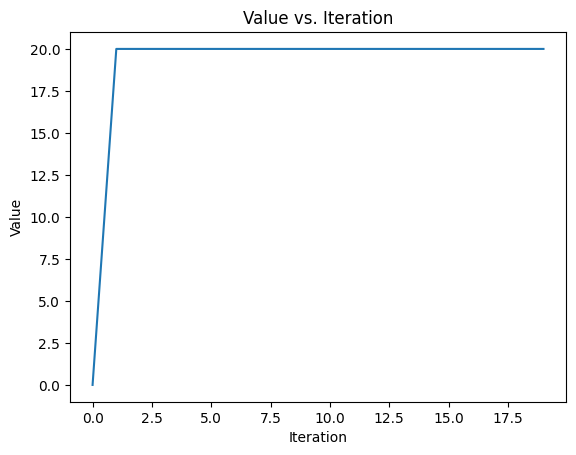

In [256]:
fig, ax = plt.subplots()
i = np.where(np.amax(taxi_V_track, axis=1)[1:] == 0)[0][0] + 1
ax.plot(np.arange(i), np.amax(taxi_V_track, axis=1)[:i])
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

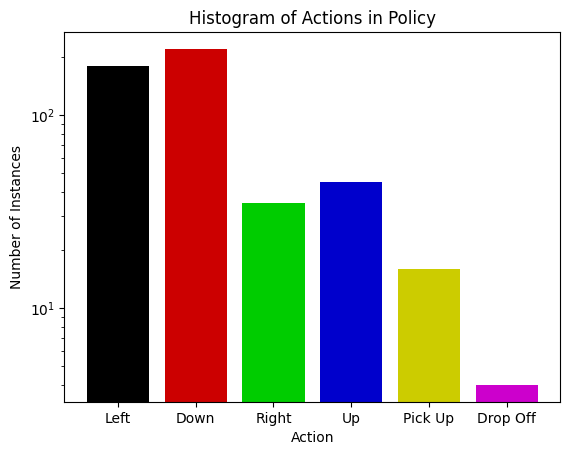

In [82]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

runtime = 0.47 seconds
runtime = 0.77 seconds
runtime = 1.50 seconds


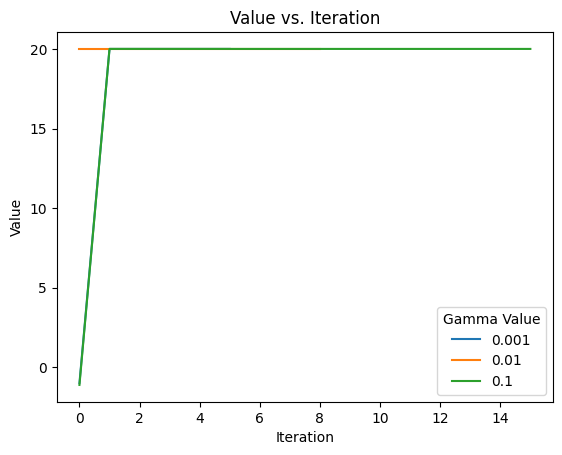

In [101]:
fig, ax = plt.subplots()
for g in [0.001, 0.01, 0.1]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.policy_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 2.43 seconds
runtime = 2.19 seconds
runtime = 1.67 seconds


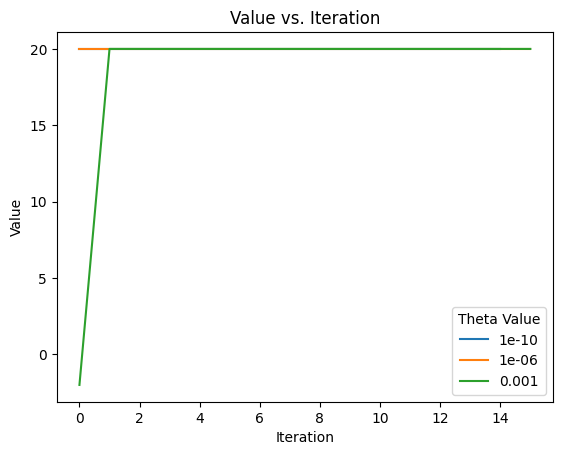

In [100]:
fig, ax = plt.subplots()
for g in [1e-32, 1e-10, 1e-2]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.policy_iteration(n_iters=1000, gamma=0.5, theta=g)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Theta Value')
plt.show()


# Taxi: Policy Iteration

In [108]:
taxi = gym.make("Taxi-v3")
taxi_planner = Planner(taxi.P)
texi_V, taxi_V_track, taxi_delta_track, taxi_reward_track, taxi_pi = taxi_planner.policy_iteration(gamma=0.9, n_iters=50, theta=1e-10)

runtime = 7.85 seconds


runtime = 0.36 seconds
runtime = 0.46 seconds
runtime = 0.75 seconds
runtime = 1.44 seconds
runtime = 7.63 seconds


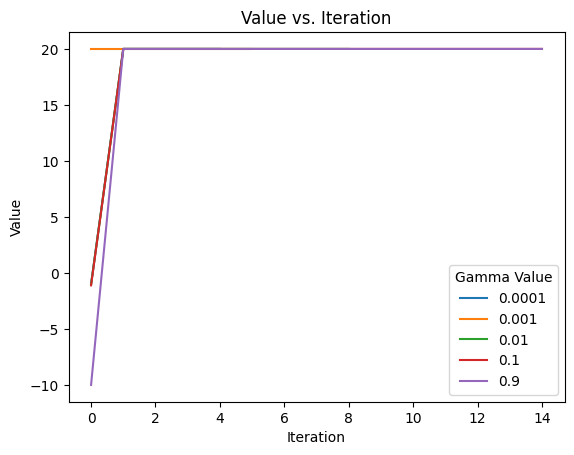

In [27]:
fig, ax = plt.subplots()
for g in [0.0001, 0.001, 0.01, 0.1, 0.9]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.policy_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


runtime = 1.69 seconds
runtime = 2.06 seconds
runtime = 2.48 seconds


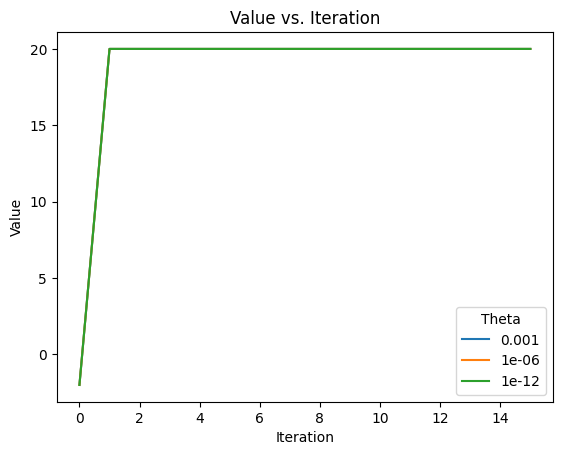

In [109]:
fig, ax = plt.subplots()
for g in [1e-3, 1e-6, 1e-12]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.policy_iteration(gamma=0.5, n_iters=1000, theta=g)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Theta')
plt.show()


In [190]:
np.where(np.amax(taxi_V_track, axis=1) == 0)[0]

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

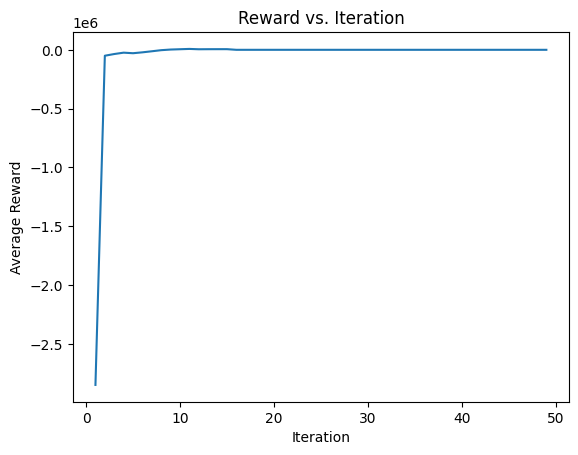

In [78]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 50), taxi_reward_track[1:50])
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Reward')
ax.set_title('Reward vs. Iteration')
plt.show()

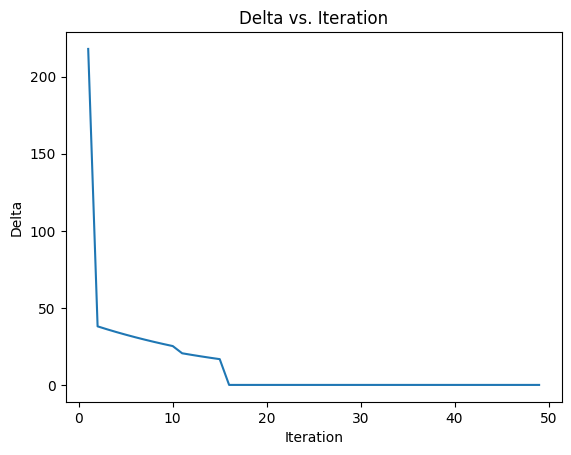

In [79]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 50), taxi_delta_track[1:50])
# ax.set_ylim(-0.01, 0.1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
plt.show()

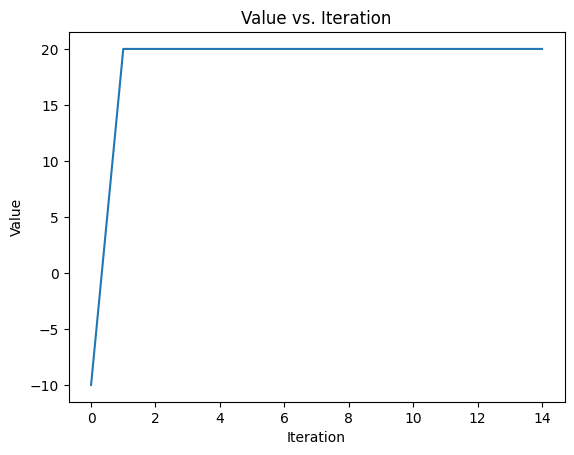

In [262]:
fig, ax = plt.subplots()
i = np.where(np.amax(taxi_V_track, axis=1)[1:] == 0)[0][0] + 1
ax.plot(np.arange(i), np.amax(taxi_V_track, axis=1)[:i])
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

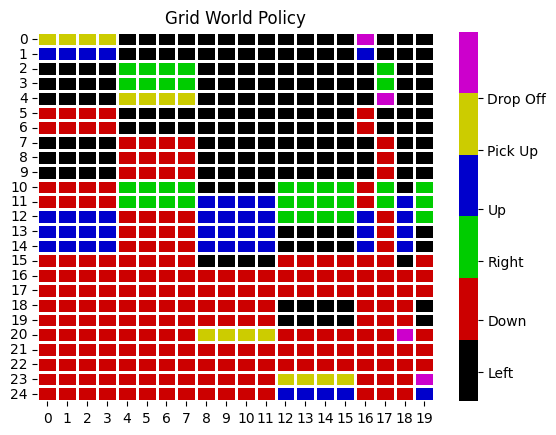

In [77]:
n_states = taxi.env.observation_space.n
new_pi = list(map(lambda x: taxi_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
taxi_grid_world_policy_plot(np.array(new_pi), (25,20), "Grid World Policy")

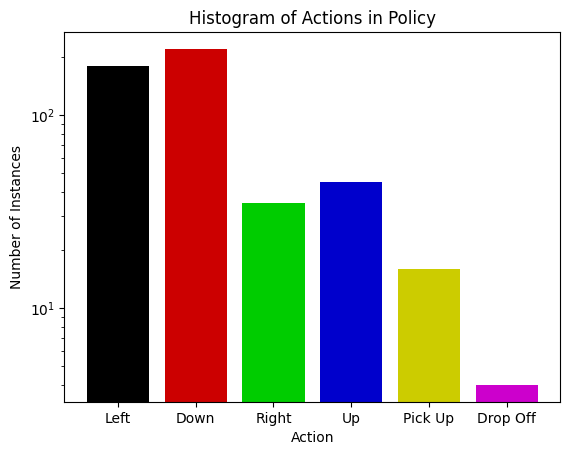

In [78]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

# Taxi: Q Learning

In [73]:
taxi = gym.make("Taxi-v3")
taxi_planner = RL(taxi)
taxi_Q, taxi_V, taxi_pi, taxi_Q_track, taxi_pi_track = taxi_planner.q_learning(gamma=1., init_epsilon=0.1, epsilon_decay_ratio=0.1, init_alpha=1., n_episodes=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")
                                                     

runtime = 0.78 seconds


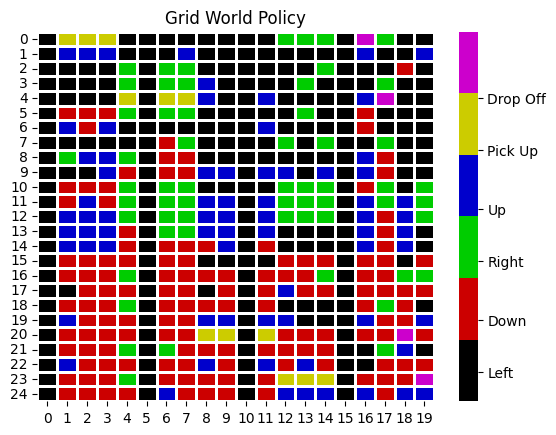

In [74]:
n_states = taxi_planner.env.observation_space.n
new_pi = list(map(lambda x: taxi_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
taxi_grid_world_policy_plot(np.array(new_pi), (25,20), "Grid World Policy")

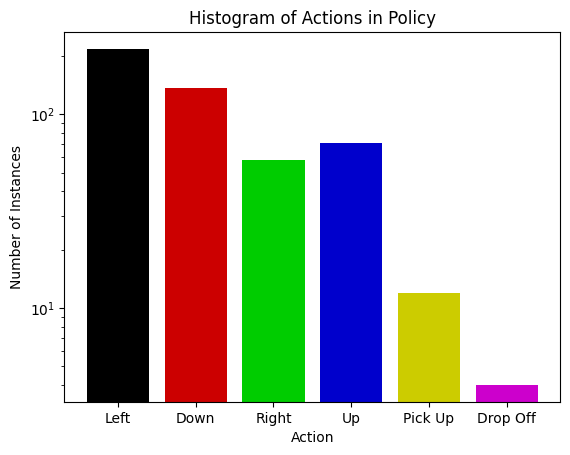

In [75]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

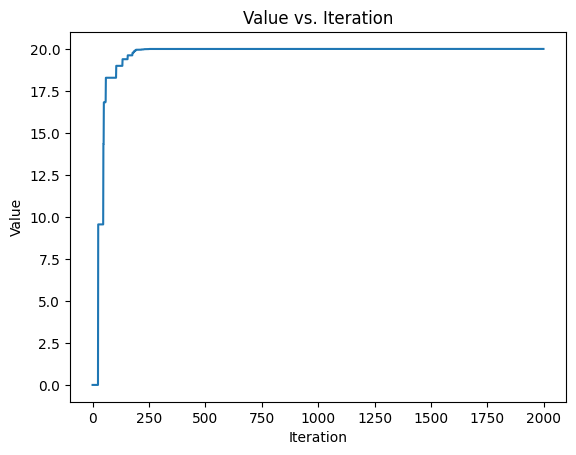

In [214]:
fig, ax = plt.subplots()
ax.plot(np.arange(2000), np.amax(np.amax(taxi_Q_track[:2000], axis=2), axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
# ax.set_ylim(19.5,20.5)
ax.set_title('Value vs. Iteration')
plt.show()

## Hyperparameter Tuning Taxi

  0%|          | 0/2000 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/schulz/Workspace/OMSCS/ML/Assignment 4/bettermdptools/algorithms/rl.py:181: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 0.61 seconds


runtime = 0.70 seconds


runtime = 0.84 seconds


runtime = 1.65 seconds


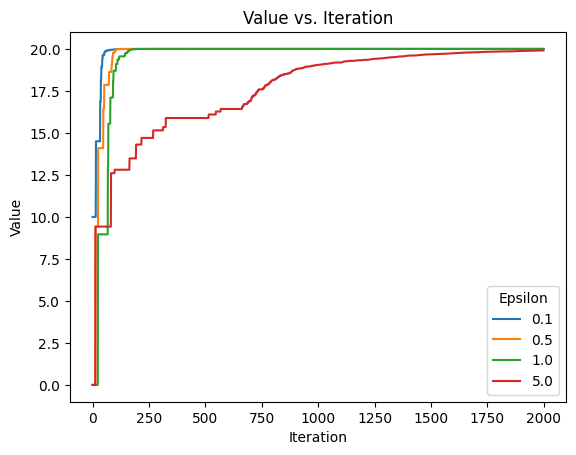

In [263]:
for i in [0.1, 0.5, 1., 5.]:
    planner = RL(taxi)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=2000, init_epsilon=i)
    plt.plot(np.arange(2000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon")
plt.show()

runtime = 0.59 seconds


runtime = 0.65 seconds


runtime = 0.60 seconds


runtime = 0.81 seconds


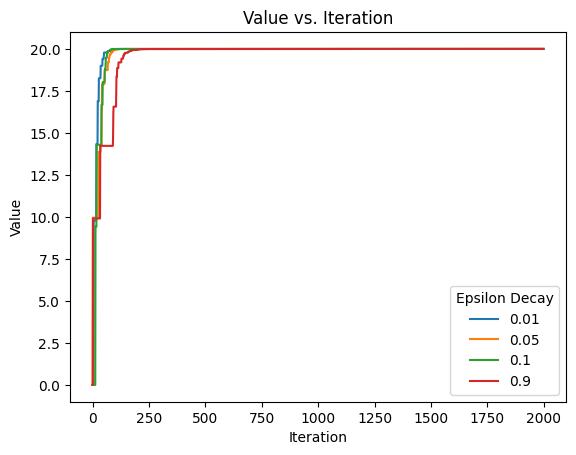

In [264]:
for i in [0.01, 0.05, 0.1, 0.9]:
    planner = RL(taxi)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=2000, epsilon_decay_ratio=i)
    plt.plot(np.arange(2000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon Decay")
plt.show()

runtime = 2.78 seconds


runtime = 2.16 seconds


runtime = 0.92 seconds


runtime = 0.62 seconds


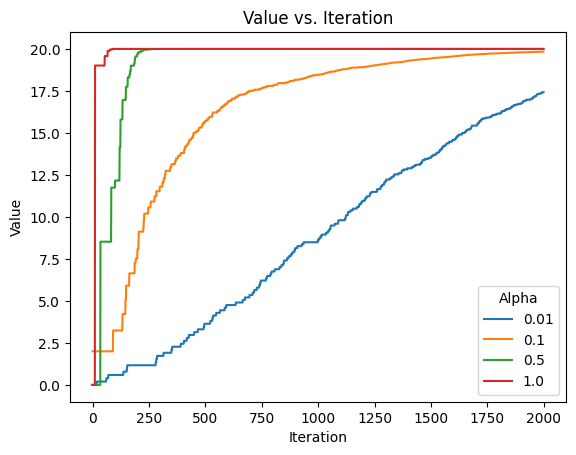

In [265]:
for i in [0.01, 0.1, 0.5, 1.]:
    planner = RL(taxi)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=2000, init_alpha=i)
    plt.plot(np.arange(2000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

runtime = 2.73 seconds


runtime = 2.20 seconds


runtime = 0.88 seconds


runtime = 0.69 seconds


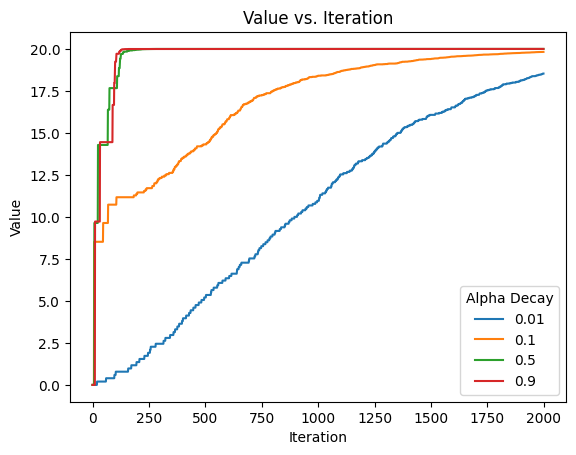

In [266]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(taxi)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=2000, alpha_decay_ratio=i)
    plt.plot(np.arange(2000), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha Decay")
plt.show()

# Taxi 10x10

## Value Iteration

In [17]:
from taxi10x10 import Taxi10x10Env
# Register the custom environment with OpenAI Gym
env_name = 'Taxi10x10-v0'
gym.envs.register(
    id=env_name,
    entry_point='taxi10x10:Taxi10x10Env',
)
# Create an instance of the environment
taxi10x10 = gym.make(env_name)

In [59]:
taxi10_planner = Planner(taxi10x10.P)
taxi10_V, taxi10_V_track, taxi10_delta_track, taxi10_reward_track, taxi10_pi = taxi10_planner.value_iteration(gamma=1.0, n_iters=1000, theta=1e-12)

runtime = 0.39 seconds


runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.08 seconds
runtime = 0.14 seconds
runtime = 0.40 seconds


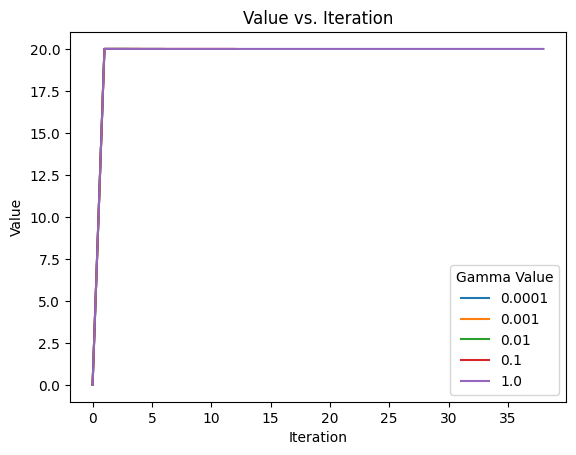

In [30]:
fig, ax = plt.subplots()
for g in [0.0001, 0.001, 0.01, 0.1, 1.]:
    planner = Planner(taxi10x10.P)
    V, V_track, delta_track, reward_track, pi = planner.value_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), np.amax(V_track, axis=1)[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


In [11]:
taxi_planner = Planner(taxi.P)
taxi_V, taxi_V_track, taxi_delta_track, taxi_reward_track, taxi_pi = taxi_planner.value_iteration(gamma=1.0, n_iters=1000, theta=1e-12)

runtime = 0.03 seconds


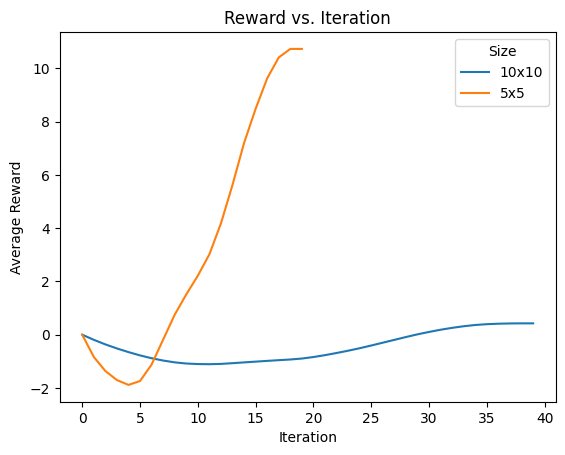

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(40), taxi10_reward_track[:40], label='10x10')
ax.plot(np.arange(20), taxi_reward_track[:20], label='5x5')
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Reward')
ax.set_title('Reward vs. Iteration')
plt.legend(title='Size')
plt.show()

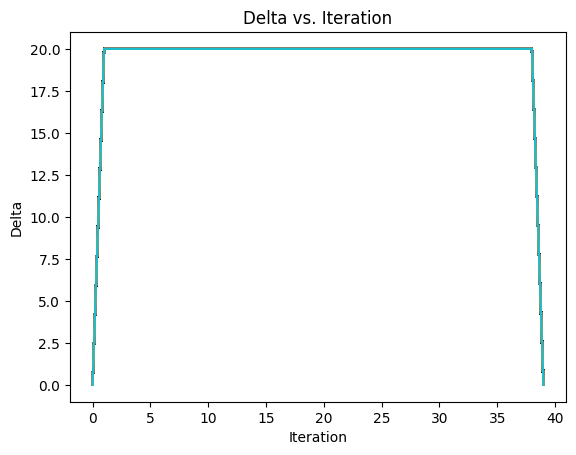

In [16]:
fig, ax = plt.subplots()
ax.plot(np.arange(40), taxi10_delta_track[:40])
# ax.set_ylim(-0.01, 0.1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Iteration')
plt.show()

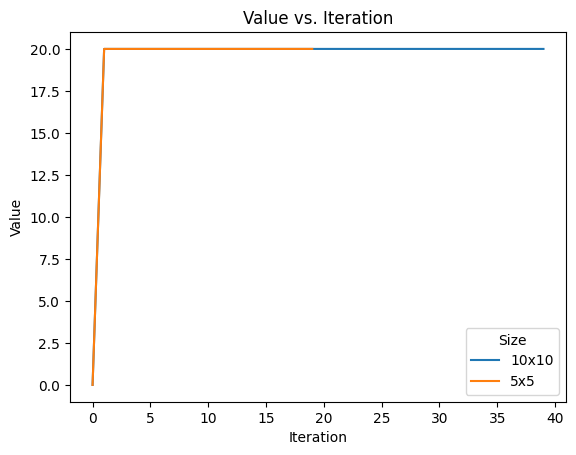

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(40), np.amax(taxi10_V_track, axis=1)[:40], label='10x10')
ax.plot(np.arange(20), np.amax(taxi_V_track, axis=1)[:20], label='5x5')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.legend(title='Size')
plt.show()

In [60]:
n_states = taxi10x10.env.observation_space.n
new_pi = list(map(lambda x: taxi10_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
# taxi_grid_world_policy_plot(np.array(new_pi)[9900:], (10,10), "Grid World Policy")

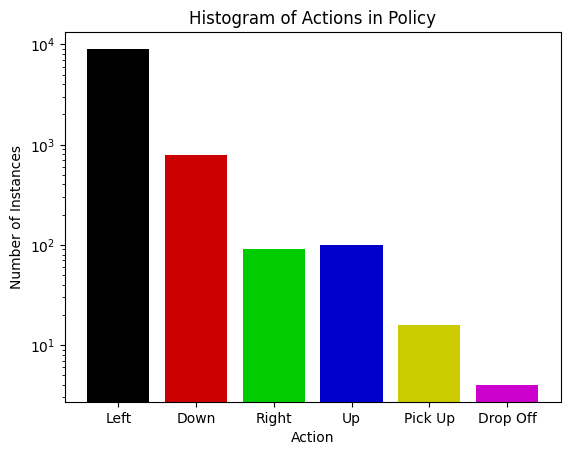

In [61]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

## Policy Iteration

In [15]:
taxi_planner = Planner(taxi.P)
taxi_V, taxi_V_track, taxi_delta_track, taxi_reward_track, taxi_pi = taxi_planner.policy_iteration(gamma=0.5, n_iters=50, theta=1e-3)

runtime = 1.73 seconds


In [18]:
taxi_planner = Planner(taxi10x10.P)
taxi10_V, taxi10_V_track, taxi10_delta_track, taxi10_reward_track, taxi10_pi = taxi_planner.policy_iteration(gamma=0.5, n_iters=50, theta=1e-3)

runtime = 954.24 seconds


runtime = 0.37 seconds
runtime = 0.43 seconds
runtime = 0.74 seconds
runtime = 1.39 seconds
runtime = 2.36 seconds


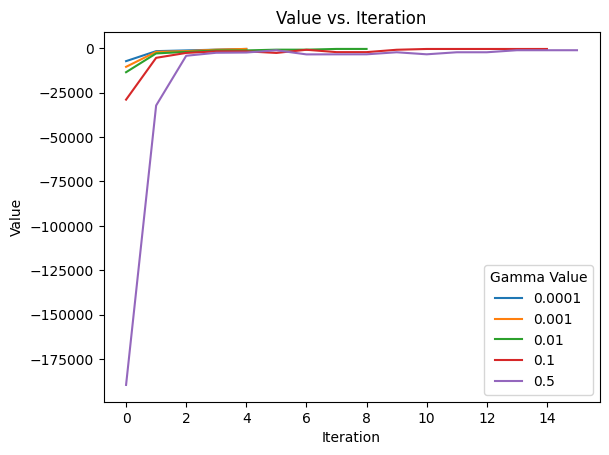

In [112]:
fig, ax = plt.subplots()
for g in [0.0001, 0.001, 0.01, 0.1, 0.5]:
    planner = Planner(taxi.P)
    V, V_track, delta_track, reward_track, pi = planner.policy_iteration(gamma=g, n_iters=1000, theta=1e-10)
    try:
        j = np.where(np.amax(V_track, axis=1)[1:] == 0)[0][0]
    except:
        j = 1000
    ax.plot(np.arange(j), reward_track[:j], label=g)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
ax.legend(title='Gamma Value')
plt.show()


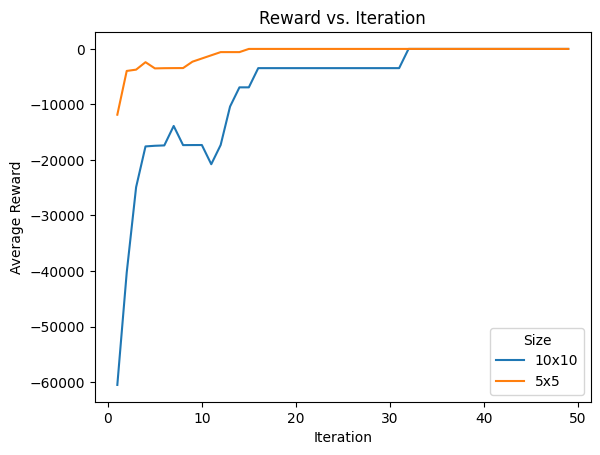

In [17]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 50), taxi10_reward_track[1:50], label='10x10')
ax.plot(np.arange(1, 50), taxi_reward_track[1:50], label='5x5')
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Reward')
ax.set_title('Reward vs. Iteration')
plt.legend(title='Size')
plt.show()

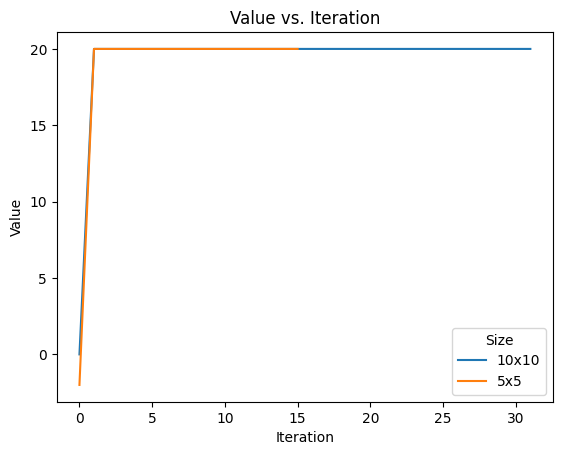

In [23]:
fig, ax = plt.subplots()
i = np.where(np.amax(taxi10_V_track, axis=1)[1:] == 0)[0][0]
j = np.where(np.amax(taxi_V_track, axis=1)[1:] == 0)[0][0]
ax.plot(np.arange(i), np.amax(taxi10_V_track, axis=1)[:i], label='10x10')
ax.plot(np.arange(j), np.amax(taxi_V_track, axis=1)[:j], label='5x5')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.legend(title='Size')
plt.show()

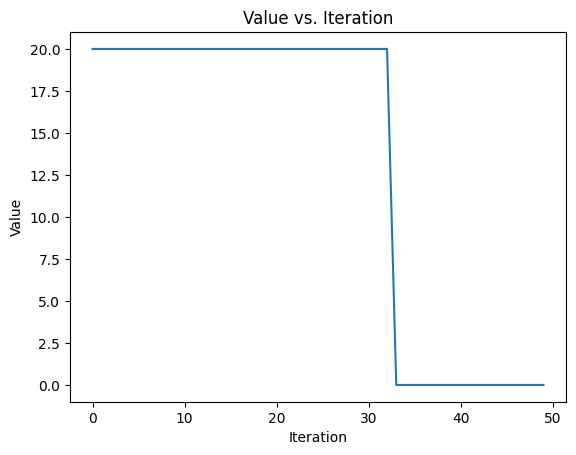

In [54]:
fig, ax = plt.subplots()
ax.plot(np.arange(50), np.amax(taxi10_V_track, axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Value vs. Iteration')
plt.show()

In [63]:
n_states = taxi10x10.env.observation_space.n
new_pi = list(map(lambda x: taxi10_pi(x), range(n_states)))
s = int(math.sqrt(n_states))

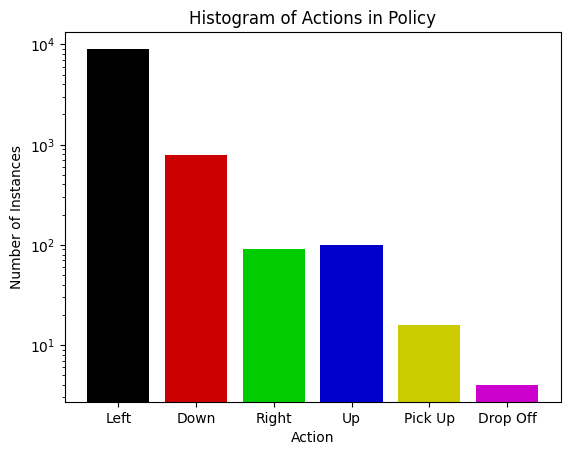

In [64]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

## Q Learning

In [42]:
taxi_planner = RL(taxi10x10)
taxi_Q, taxi_V, taxi_pi, taxi_Q_track, taxi_pi_track = taxi_planner.q_learning(gamma=1., n_episodes=5000, init_alpha=0.9, init_epsilon=0.01)

  0%|          | 0/5000 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
                                                     

runtime = 3.09 seconds


In [43]:
n_states = taxi10x10.env.observation_space.n
new_pi = list(map(lambda x: taxi_pi(x), range(n_states)))
s = int(math.sqrt(n_states))

In [49]:
set(new_pi)

{0, 1, 2, 3, 4, 5}

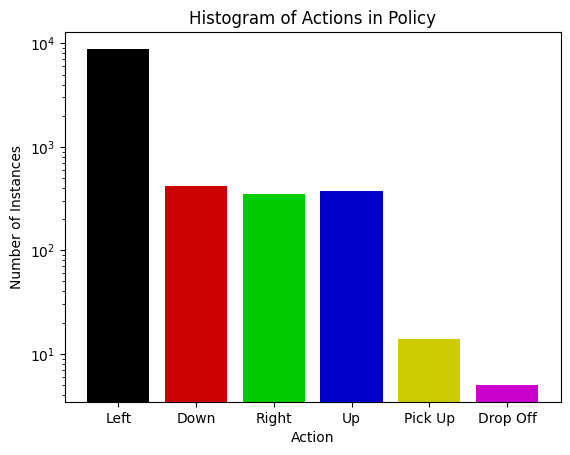

In [58]:
u, counts = np.unique(new_pi, return_counts=True)
my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0), (0.8, 0.8, 0.0, 1.0), (0.8, 0.0, 0.8, 1.0))
plt.bar(np.arange(len(u)), counts, color=my_colors)
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Action')
plt.ylabel('Number of Instances')
plt.yscale('log')
plt.xticks(range(6),['Left', 'Down', 'Right', 'Up', 'Pick Up', 'Drop Off'])
plt.title("Histogram of Actions in Policy")
plt.show()

# plt.hist(new_pi)
# 
# 
# plt.xlim(-0.1, 5.3)
# plt.show()

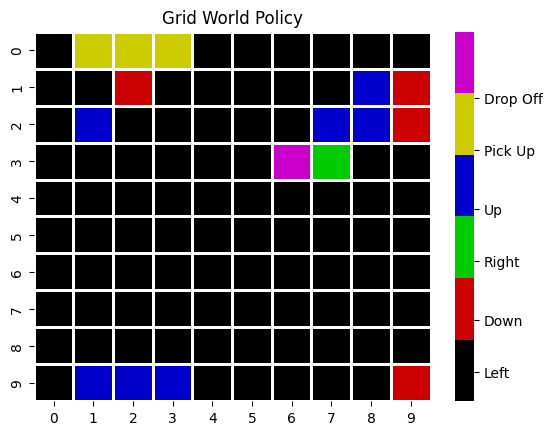

In [45]:
n_states = taxi_planner.env.observation_space.n
new_pi = list(map(lambda x: taxi_pi(x), range(n_states)))
s = int(math.sqrt(n_states))
taxi_grid_world_policy_plot(np.array(new_pi)[:100], (10,10), "Grid World Policy")

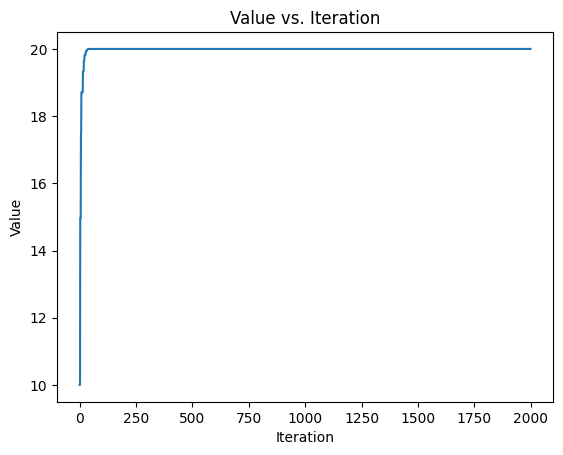

In [27]:
fig, ax = plt.subplots()
ax.plot(np.arange(2000), np.amax(np.amax(taxi_Q_track[:2000], axis=2), axis=1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
# ax.set_ylim(19.5,20.5)
ax.set_title('Value vs. Iteration')
plt.show()

runtime = 2.50 seconds


runtime = 2.40 seconds


runtime = 2.45 seconds


runtime = 2.49 seconds


runtime = 2.62 seconds


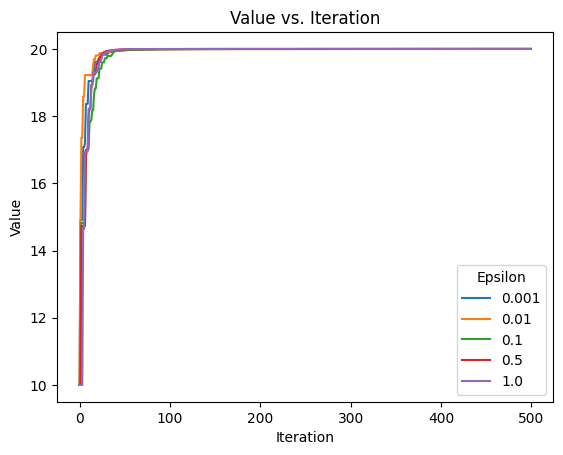

In [32]:
for i in [0.001, 0.01, 0.1, 0.5, 1.]:
    planner = RL(taxi10x10)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500, init_epsilon=i)
    plt.plot(np.arange(500), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon")
plt.show()

runtime = 2.63 seconds


runtime = 2.43 seconds


runtime = 2.40 seconds


runtime = 2.40 seconds


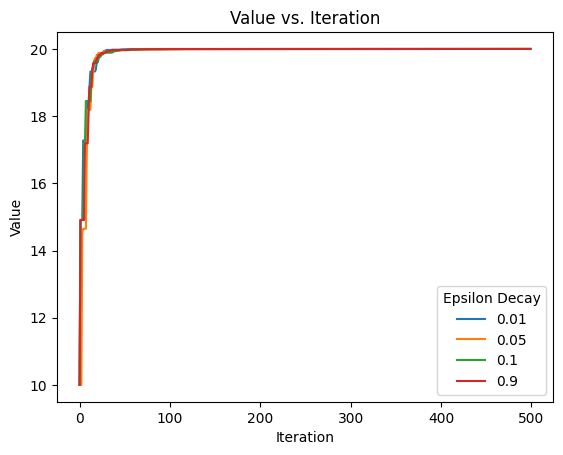

In [33]:
for i in [0.01, 0.05, 0.1, 0.9]:
    planner = RL(taxi10x10)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500, epsilon_decay_ratio=i)
    plt.plot(np.arange(500), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Epsilon Decay")
plt.show()

runtime = 8.72 seconds


runtime = 4.81 seconds


runtime = 2.48 seconds


runtime = 2.13 seconds


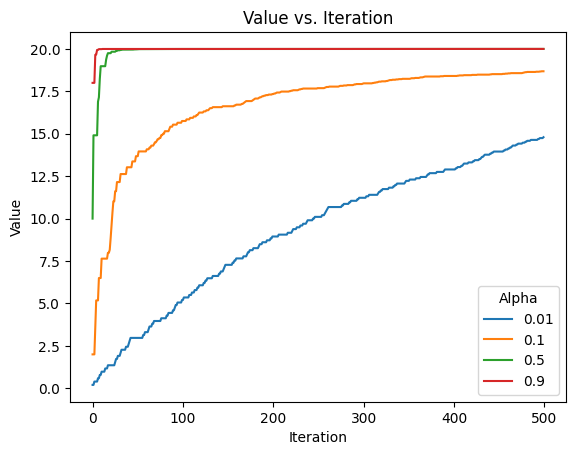

In [37]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(taxi10x10)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500, init_alpha=i)
    plt.plot(np.arange(500), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha")
plt.show()

runtime = 8.72 seconds


runtime = 5.12 seconds


runtime = 2.37 seconds


runtime = 2.22 seconds


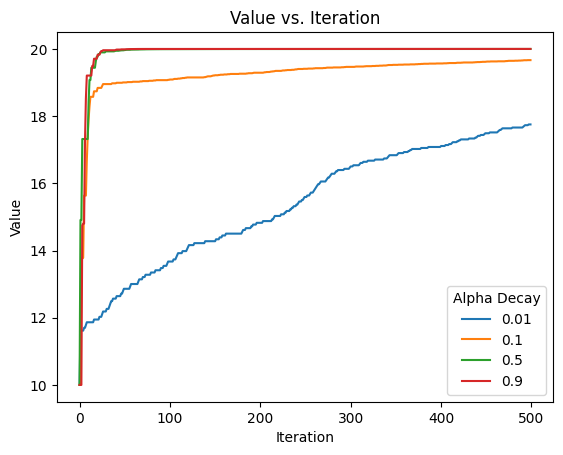

In [38]:
for i in [0.01, 0.1, 0.5, 0.9]:
    planner = RL(taxi10x10)
    Q, V, pi, Q_track, pi_track = planner.q_learning(n_episodes=500, alpha_decay_ratio=i)
    plt.plot(np.arange(500), np.amax(np.amax(Q_track, axis=2), axis=1), label=str(i))
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value vs. Iteration')
plt.legend(title="Alpha Decay")
plt.show()